In [ ]:
!pip install snowflake-connector-python pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 521.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 3.0 MB/s eta 0:00:00


In [87]:
import snowflake.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Creating snowflake connection - as a best practise we would want to store the password else where but for now we will go forward with this
snowflake_user = 'shubhangisnowflake'
snowflake_password = 'Noora@777'
snowflake_account = 'qh86287.europe-west3.gcp'
snowflake_warehouse = 'AIRBYTE_WAREHOUSE'
snowflake_database = 'AIRBYTE_DATABASE'
snowflake_schema = 'AIRBYTE_SCHEMA'

# Establishing the connection
conn = snowflake.connector.connect(
    user=snowflake_user,
    password=snowflake_password,
    account=snowflake_account,
    warehouse=snowflake_warehouse,
    database=snowflake_database,
    schema=snowflake_schema
)


In [ ]:
# SQL query to fetch data from the Snowflake table
query = "SELECT * FROM combined_message_status"

# Load the data into a DataFrame
df = pd.read_sql(query, conn)

# Display the first few rows of the DataFrame
df.head()


<ipython-input-11-45bc1417d36e>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,MESSAGE_ID,MESSAGE_CONTENT,MESSAGE_MESSAGE_TYPE,MESSAGE_MASKED_ADDRESSEE,MESSAGE_MASKED_FROM_ADDR,MESSAGE_DIRECTION,MESSAGE_EXTERNAL_ID,MESSAGE_EXTERNAL_TIMESTAMP,MESSAGE_IS_DELETED,MESSAGE_LAST_STATUS,...,MESSAGE_UPDATED_AT,STATUS_ID,STATUS_STATUS,STATUS_TIMESTAMP,STATUS_UUID,STATUS_MESSAGE_UUID,STATUS_NUMBER_ID,STATUS_INSERTED_AT,STATUS_UPDATED_AT,RECORD_STATUS
0,728539524,None,template,1543543794511505201,4454300900215722365,outbound,gBEGkZdlNwKGAgnf9E06XV8ybFs,NaT,None,read,...,2024-01-26 13:54:46,794995980,read,2024-01-26 13:54:46,a52d21fb-efe1-413a-add9-c9f729a1ea44,786c0264-5c15-146e-5323-44c9fb0ba229,182,2024-01-26 13:54:46,2024-01-26 13:54:46,Unique
1,801891612,None,template,9217215151192870281,4454300900215722365,outbound,wamid.HBgMOTE5MzkxMjI5Mzg2FQIAERgSODVENDgwMDk0...,NaT,None,read,...,2024-03-25 02:48:26,892393832,read,2024-03-25 02:48:25,b9906288-65e3-4bfc-bd68-2779b1942bd4,f4100cef-2f18-6dfe-b656-822699e21d00,182,2024-03-25 02:48:26,2024-03-25 02:48:26,Duplicate
2,692186420,None,template,7607605549563904119,4454300900215722365,outbound,gBEGkZUBVWJ3AglFx2hUhdokA24,NaT,None,read,...,2023-12-03 08:16:30,747556389,read,2023-12-03 08:16:30,8e09f112-e2c1-49f2-8cea-232b4c194723,82217ca1-15bc-f77f-1151-6900c35ce889,182,2023-12-03 08:16:30,2023-12-03 08:16:30,Unique
3,826864940,None,template,7540468969134897529,4454300900215722365,outbound,wamid.HBgMOTE2MjM5NDIxMzQ4FQIAERgSRUE2NjAyMzlF...,NaT,None,delivered,...,2024-04-19 06:28:17,929263896,read,2024-04-19 06:50:58,b110fd6d-b243-4a9a-b41a-1daf74930448,256f0364-1e85-2b09-98b7-cbbd549a344f,182,2024-04-19 06:50:58,2024-04-19 06:50:58,Unique
4,474539247,None,template,4879772226051811302,4454300900215722365,outbound,gBEGkXWJNIETAgnSbnhgSBedsl8,NaT,None,read,...,2023-08-07 02:40:39,495233703,read,2023-08-07 02:40:39,cfcdf461-7ea3-42b2-8fd5-db4d8798e1e1,fa531955-ec4b-7bb9-d44b-de616b6c8b60,182,2023-08-07 02:40:39,2023-08-07 02:40:39,Unique


In [ ]:
#Removinf duplicated records
cleaned_df = df[df['RECORD_STATUS']=='Unique']
cleaned_df.head()

,MESSAGE_ID,MESSAGE_CONTENT,MESSAGE_MESSAGE_TYPE,MESSAGE_MASKED_ADDRESSEE,MESSAGE_MASKED_FROM_ADDR,MESSAGE_DIRECTION,MESSAGE_EXTERNAL_ID,MESSAGE_EXTERNAL_TIMESTAMP,MESSAGE_IS_DELETED,MESSAGE_LAST_STATUS,...,MESSAGE_UPDATED_AT,STATUS_ID,STATUS_STATUS,STATUS_TIMESTAMP,STATUS_UUID,STATUS_MESSAGE_UUID,STATUS_NUMBER_ID,STATUS_INSERTED_AT,STATUS_UPDATED_AT,RECORD_STATUS
0,728539524,None,template,1543543794511505201,4454300900215722365,outbound,gBEGkZdlNwKGAgnf9E06XV8ybFs,NaT,None,read,...,2024-01-26 13:54:46,794995980,read,2024-01-26 13:54:46,a52d21fb-efe1-413a-add9-c9f729a1ea44,786c0264-5c15-146e-5323-44c9fb0ba229,182,2024-01-26 13:54:46,2024-01-26 13:54:46,Unique
2,692186420,None,template,7607605549563904119,4454300900215722365,outbound,gBEGkZUBVWJ3AglFx2hUhdokA24,NaT,None,read,...,2023-12-03 08:16:30,747556389,read,2023-12-03 08:16:30,8e09f112-e2c1-49f2-8cea-232b4c194723,82217ca1-15bc-f77f-1151-6900c35ce889,182,2023-12-03 08:16:30,2023-12-03 08:16:30,Unique
3,826864940,None,template,7540468969134897529,4454300900215722365,outbound,wamid.HBgMOTE2MjM5NDIxMzQ4FQIAERgSRUE2NjAyMzlF...,NaT,None,delivered,...,2024-04-19 06:28:17,929263896,read,2024-04-19 06:50:58,b110fd6d-b243-4a9a-b41a-1daf74930448,256f0364-1e85-2b09-98b7-cbbd549a344f,182,2024-04-19 06:50:58,2024-04-19 06:50:58,Unique
4,474539247,None,template,4879772226051811302,4454300900215722365,outbound,gBEGkXWJNIETAgnSbnhgSBedsl8,NaT,None,read,...,2023-08-07 02:40:39,495233703,read,2023-08-07 02:40:39,cfcdf461-7ea3-42b2-8fd5-db4d8798e1e1,fa531955-ec4b-7bb9-d44b-de616b6c8b60,182,2023-08-07 02:40:39,2023-08-07 02:40:39,Unique
5,673365045,None,template,8858155127066326485,4454300900215722365,outbound,gBEGkXAYcgIpAgmFMzfbmm5_NKQ,NaT,None,read,...,2023-11-21 07:46:26,725145738,read,2023-11-21 07:46:25,8b36bf22-ec11-4bb1-8a0a-974283dd9371,779509dd-8ca4-31ee-1656-5e4e6b4b0a56,182,2023-11-21 07:46:26,2023-11-21 07:46:26,Unique


In [ ]:
#Checking for missing values
cleaned_df.isna().sum()

,0
MESSAGE_ID,0
MESSAGE_CONTENT,8476
MESSAGE_MESSAGE_TYPE,0
MESSAGE_MASKED_ADDRESSEE,0
MESSAGE_MASKED_FROM_ADDR,0
MESSAGE_DIRECTION,0
MESSAGE_EXTERNAL_ID,0
MESSAGE_EXTERNAL_TIMESTAMP,9618
MESSAGE_IS_DELETED,9625
MESSAGE_LAST_STATUS,7


Here the columns we will be needing in future are all non null hence we dont need to worry about missing values.

In [88]:
cleaned_df['MESSAGE_UPDATED_AT'] = pd.to_datetime(cleaned_df['MESSAGE_UPDATED_AT'])
cleaned_df['MESSAGE_UPDATED_AT_MONTH'] = df['MESSAGE_UPDATED_AT'].dt.month
cleaned_df['MESSAGE_UPDATED_AT_YEAR'] = df['MESSAGE_UPDATED_AT'].dt.year
cleaned_df['MESSAGE_UPDATED_AT_DAY'] = df['MESSAGE_UPDATED_AT'].dt.day
cleaned_df['MESSAGE_UPDATED_AT_TIME'] = df['MESSAGE_UPDATED_AT'].dt.time
cleaned_df.head()


,MESSAGE_ID,MESSAGE_CONTENT,MESSAGE_MESSAGE_TYPE,MESSAGE_MASKED_ADDRESSEE,MESSAGE_MASKED_FROM_ADDR,MESSAGE_DIRECTION,MESSAGE_EXTERNAL_ID,MESSAGE_EXTERNAL_TIMESTAMP,MESSAGE_IS_DELETED,MESSAGE_LAST_STATUS,...,STATUS_MESSAGE_UUID,STATUS_NUMBER_ID,STATUS_INSERTED_AT,STATUS_UPDATED_AT,RECORD_STATUS,MESSAGE_UPDATED_AT_MONTH,MESSAGE_UPDATED_AT_year,MESSAGE_UPDATED_AT_DAY,MESSAGE_UPDATED_AT_TIME,MESSAGE_UPDATED_AT_YEAR
0,728539524,None,template,1543543794511505201,4454300900215722365,outbound,gBEGkZdlNwKGAgnf9E06XV8ybFs,NaT,None,read,...,786c0264-5c15-146e-5323-44c9fb0ba229,182,2024-01-26 13:54:46,2024-01-26 13:54:46,Unique,1,2024,26,13:54:46,2024
2,692186420,None,template,7607605549563904119,4454300900215722365,outbound,gBEGkZUBVWJ3AglFx2hUhdokA24,NaT,None,read,...,82217ca1-15bc-f77f-1151-6900c35ce889,182,2023-12-03 08:16:30,2023-12-03 08:16:30,Unique,12,2023,3,08:16:30,2023
3,826864940,None,template,7540468969134897529,4454300900215722365,outbound,wamid.HBgMOTE2MjM5NDIxMzQ4FQIAERgSRUE2NjAyMzlF...,NaT,None,delivered,...,256f0364-1e85-2b09-98b7-cbbd549a344f,182,2024-04-19 06:50:58,2024-04-19 06:50:58,Unique,4,2024,19,06:28:17,2024
4,474539247,None,template,4879772226051811302,4454300900215722365,outbound,gBEGkXWJNIETAgnSbnhgSBedsl8,NaT,None,read,...,fa531955-ec4b-7bb9-d44b-de616b6c8b60,182,2023-08-07 02:40:39,2023-08-07 02:40:39,Unique,8,2023,7,02:40:39,2023
5,673365045,None,template,8858155127066326485,4454300900215722365,outbound,gBEGkXAYcgIpAgmFMzfbmm5_NKQ,NaT,None,read,...,779509dd-8ca4-31ee-1656-5e4e6b4b0a56,182,2023-11-21 07:46:26,2023-11-21 07:46:26,Unique,11,2023,21,07:46:26,2023


**The number of total and active users over time, for a selected time range (e.g., per week for the last 3 months). Total users are those that sent or received a message. Active users are those that send us a
message (inbound).**


In [90]:
active_users = cleaned_df[cleaned_df['MESSAGE_DIRECTION'] == 'inbound']

In [91]:
total_users_yearly = cleaned_df.groupby('MESSAGE_UPDATED_AT_YEAR')['MESSAGE_MASKED_FROM_ADDR'].nunique().reset_index(name='total_users')
active_users_yearly = active_users.groupby('MESSAGE_UPDATED_AT_YEAR')['MESSAGE_MASKED_FROM_ADDR'].nunique().reset_index(name='active_users')

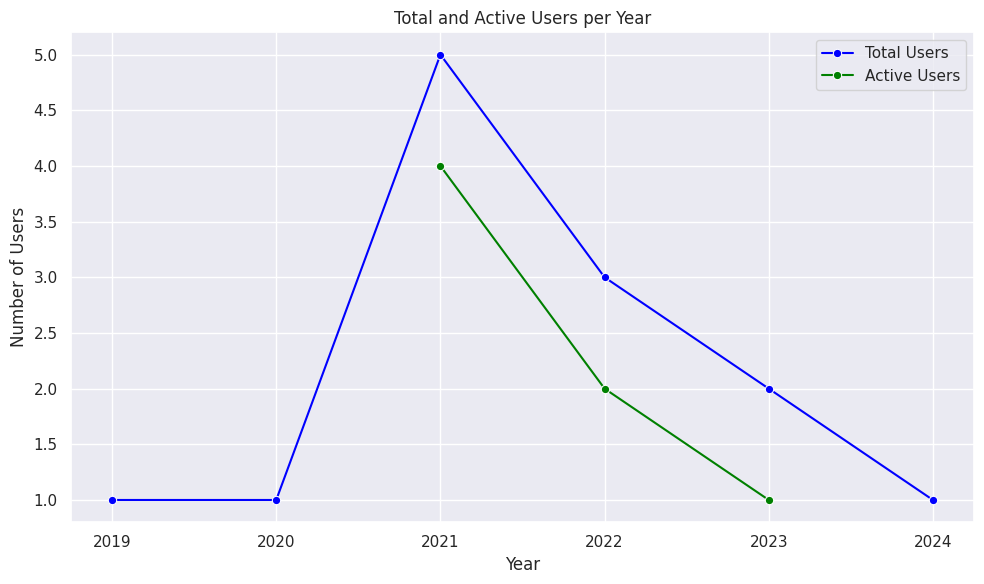

In [92]:
# Set the style of seaborn
sns.set_theme(style="darkgrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot total users
sns.lineplot(data=total_users_yearly,
             x='MESSAGE_UPDATED_AT_YEAR',
             y='total_users',
             marker='o',
             color='blue',
             label='Total Users')

# Plot active users
sns.lineplot(data=active_users_yearly,
             x='MESSAGE_UPDATED_AT_YEAR',
             y='active_users',
             marker='o',
             color='green',
             label='Active Users')

# Update layout
plt.title('Total and Active Users per Year')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [96]:
total_users_monthly = cleaned_df.groupby('MESSAGE_UPDATED_AT_MONTH')['MESSAGE_MASKED_FROM_ADDR'].nunique().reset_index(name='total_users')
active_users_monthly = active_users.groupby('MESSAGE_UPDATED_AT_MONTH')['MESSAGE_MASKED_FROM_ADDR'].nunique().reset_index(name='active_users')

In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the trace for total users (line with markers)
fig.add_trace(go.Scatter(x=total_users_monthly['MESSAGE_UPDATED_AT_MONTH'],
                         y=total_users_monthly['total_users'],
                         mode='lines+markers',
                         name='Total Users',
                         line=dict(color='blue')))

# Add the trace for active users (line with markers)
fig.add_trace(go.Scatter(x=active_users_monthly['MESSAGE_UPDATED_AT_MONTH'],
                         y=active_users_monthly['active_users'],
                         mode='lines+markers',
                         name='Active Users',
                         line=dict(color='green')))

# Update layout
fig.update_layout(
    title='Total and Active Users per Month',
    xaxis_title='Month',
    yaxis_title='Number of Users',
    hovermode='x unified',
    template='plotly_dark'  # You can use 'plotly', 'ggplot2', or other themes if preferred
)

# Display the plot
fig.show()


**ii. The fraction of sent messages that are read, and the amount of time
between when an outbound message is sent and when it is read.**



In [103]:
#Filter outbound messages and those with a 'sent' and 'read' status
outbound_messages = cleaned_df[cleaned_df['MESSAGE_DIRECTION'] == 'outbound']
read_messages = outbound_messages[outbound_messages['STATUS_STATUS'] == 'read']


In [104]:

#Calculate the fraction of sent messages that are read
total_sent = len(outbound_messages)
total_read = len(read_messages)
fraction_read = total_read / total_sent


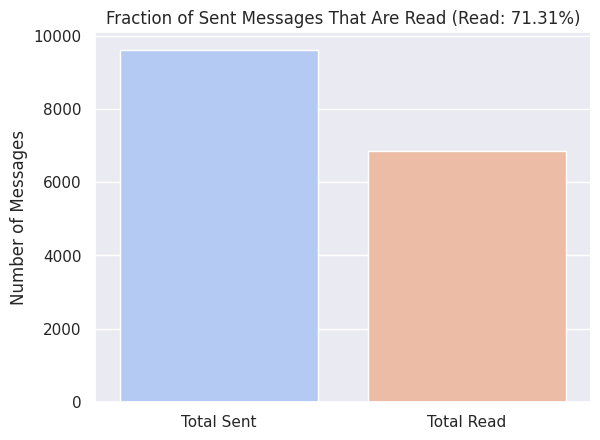

In [105]:

#Calculate time difference between 'sent' and 'read'
outbound_messages['TIME_TO_READ'] = (outbound_messages['STATUS_UPDATED_AT'] - outbound_messages['STATUS_INSERTED_AT']).dt.total_seconds() / 3600

# Create a bar chart to show the fraction of messages read
sns.barplot(x=['Total Sent', 'Total Read'], y=[total_sent, total_read], palette='coolwarm')
plt.title(f'Fraction of Sent Messages That Are Read (Read: {fraction_read:.2%})')
plt.ylabel('Number of Messages')
plt.show()


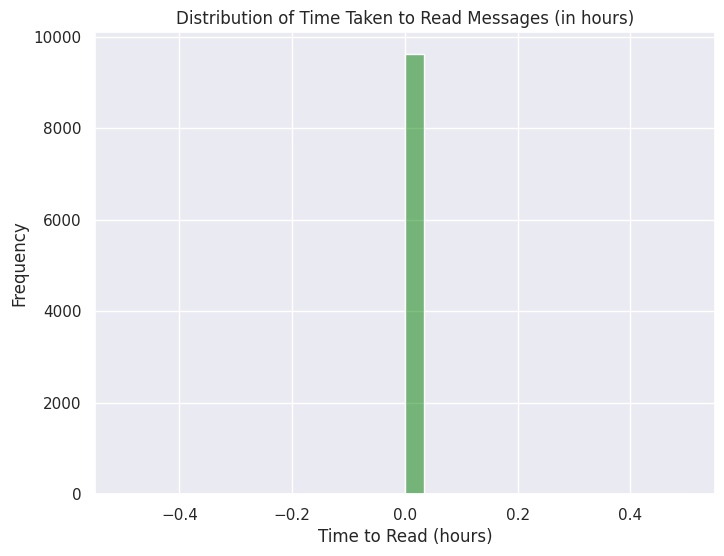

In [106]:
#Filter messages that have a time_to_read value
time_to_read_df = outbound_messages[outbound_messages['TIME_TO_READ'].notna()]
#Plot the distribution of time to read messages
plt.figure(figsize=(8,6))
sns.histplot(time_to_read_df['TIME_TO_READ'], kde=True, bins=30, color='green')
plt.title('Distribution of Time Taken to Read Messages (in hours)')
plt.xlabel('Time to Read (hours)')
plt.ylabel('Frequency')
plt.show()

**iii. The number of outbound messages in the last week by status, e.g., sent,
delivered, read.**

In [100]:
last_week_date = outbound_messages['STATUS_UPDATED_AT'].max() - pd.DateOffset(weeks=1)

In [101]:
outbound_last_week = outbound_messages[outbound_messages['STATUS_UPDATED_AT'] >  last_week_date]

  STATUS_STATUS  count
0     delivered     64
1        failed     19
2          read    294
3          sent     26


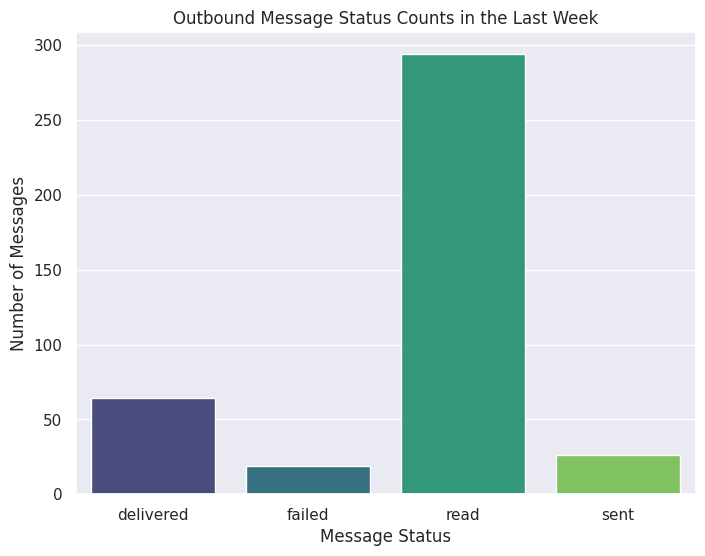

In [102]:
# Group by status and count the number of outbound messages in the last week
status_counts = outbound_last_week.groupby('STATUS_STATUS')['MESSAGE_ID'].count().reset_index(name='count')

# Display the status-wise counts
print(status_counts)

# Optional: Plot the status-wise counts using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='STATUS_STATUS', y='count', data=status_counts, palette='viridis')
plt.title('Outbound Message Status Counts in the Last Week')
plt.xlabel('Message Status')
plt.ylabel('Number of Messages')
plt.show()
